# Data Visualization Exercise

For this exercise, use your creativity and understanding of the different concepts of data visualization.

Create a plot (or a series of subplots) from whatever dataset you choose. As much as possible, please choose a dataset of relevance for visual storytelling. Make the plot using `python`. It doesn't matter if you choose to use `matplotlib` or `seaborn`. 

For the submission:
1. Upload the code that generates the plot to your GitHub repository or to Google Classroom (whichever method you're using for submissions).
2. Upload a png file of the visualization to Google Classroom and write in the Private Comments the caption for the figure you submitted.
3. Make sure to provide the data source in the same folder.

Please make an effort to make it a good and compelling graphic. Choose your colors according to the type of data you're visualizing. Make sure to label everything and avoid clutter. 

As a reference for color choices, you can go to [CARTOColors](https://carto.com/carto-colors/). Simply click on the color map of your choice and it will copy the HEX code of the color.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Data Source

Edit this cell to place the direct link to your data source.

You may use the datasets you've downloaded for your project as your submission for this assignment. 

In [2]:
# Read in data
data = pd.read_csv('covid_spread_from_doh_tableau.csv')
data2 = pd.read_csv('covid_spread_from_daily_summary.csv')

# Perform Data Wrangling
data2 = data2[['date', 'confirmed_new']]
data.rename(columns={"values": "actual_case"}, inplace=True)
data['date'] = pd.to_datetime(data['date'])
data2['date'] = pd.to_datetime(data2['date'])
data = data.merge(data2, how='outer', on="date")
idx = pd.date_range('02-15-2020', '08-29-2020')
data.set_index(['date'], inplace=True)
# data.index = pd.DatetimeIndex(data['date'])
data = data.reindex(idx, fill_value=0)
data.fillna(0, inplace=True)
data['actual_case'] = data['actual_case'].astype('int32')
data['confirmed_new'] = data['confirmed_new'].astype('int32')
print(data)

            actual_case  confirmed_new
2020-02-15            0              0
2020-02-16            0              0
2020-02-17            0              0
2020-02-18            0              0
2020-02-19            0              0
...                 ...            ...
2020-08-25         1041           2965
2020-08-26          488           5277
2020-08-27           74           3249
2020-08-28            0           3999
2020-08-29            0           3637

[197 rows x 2 columns]


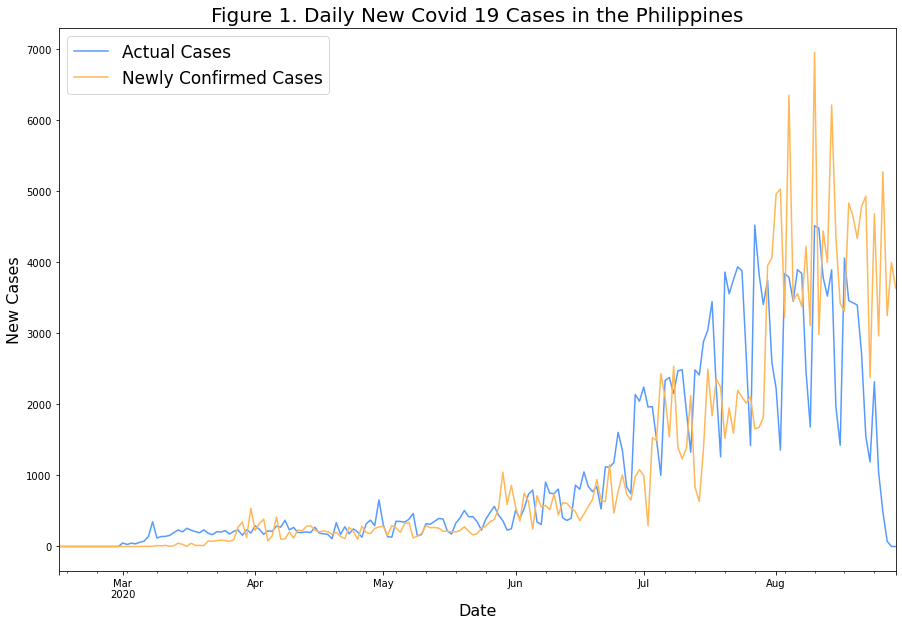

In [3]:
# Perform your data wrangling and descriptive stats to help
axes_object = data['actual_case'].plot(color='#579AFF', figsize=(15, 10), label='Actual Cases')
data['confirmed_new'].plot(ax=axes_object, color='#FFB757', figsize=(15, 10), label='Newly Confirmed Cases')
axes_object.set_title('Figure 1. Daily New Covid 19 Cases in the Philippines', fontsize=20)
axes_object.set_xlabel('Date', fontsize=16)
axes_object.set_ylabel('New Cases', fontsize=16)
axes_object.legend(fontsize=17)
fig1 = axes_object.get_figure()

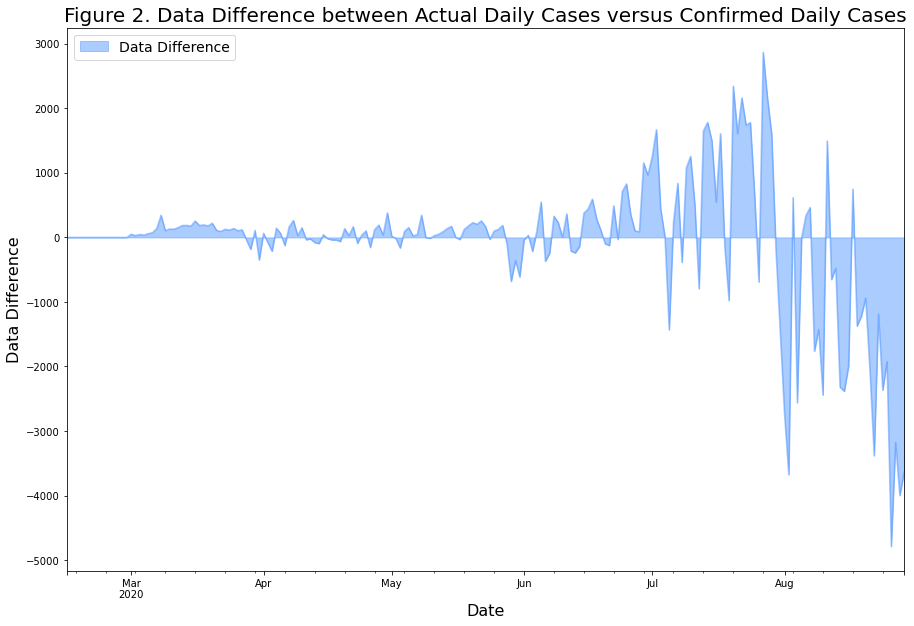

In [4]:
data['diff'] = data['actual_case'] - data['confirmed_new']

axes_object2 = data['diff'].plot(kind='area', stacked=False, color='#579AFF', figsize=(15, 10), label='Data Difference')
axes_object2.set_title('Figure 2. Data Difference between Actual Daily Cases versus Confirmed Daily Cases', fontsize=20)
axes_object2.set_xlabel('Date', fontsize=16)
axes_object2.set_ylabel('Data Difference', fontsize=16)
axes_object2.legend(fontsize=14)
fig2 = axes_object2.get_figure()

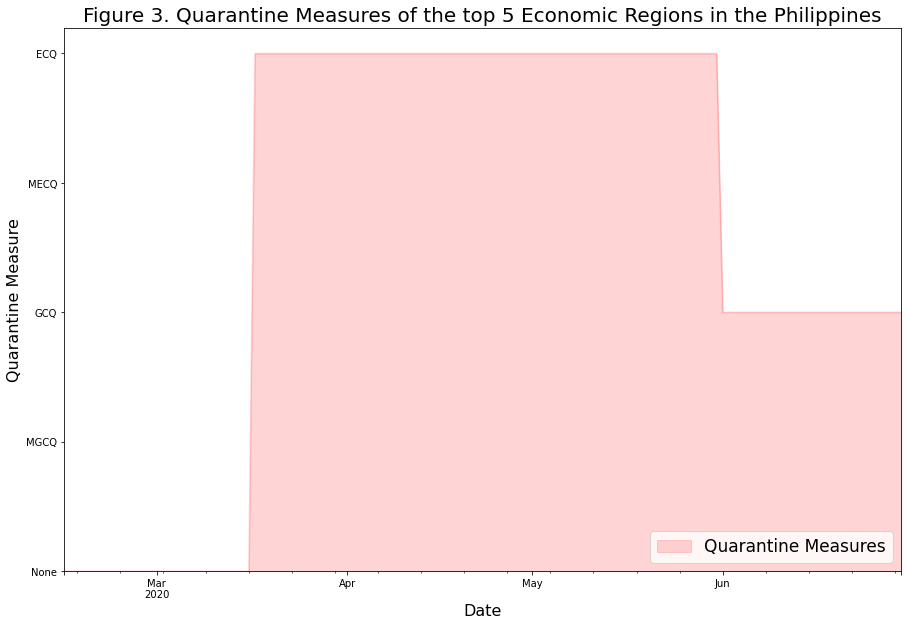

In [5]:
import datetime

data3 = pd.read_csv('quarantine_measures.csv')
data3 = data3[['Date', 'mode', 'mode Q Code']]
data3['date'] = pd.to_datetime(data3['Date'])
data3 = data3[['date', 'mode', 'mode Q Code']]
data3_reindexed = data3.set_index(['date'])
data_with_q_mode = data.merge(data3_reindexed, how='outer', left_index=True, right_index=True)
data_with_q_mode['mode Q Code'].fillna(0, inplace=True)
data_with_q_mode['mode'].fillna('NONE', inplace=True)
data_with_q_mode['mode Q Code'] = data_with_q_mode['mode Q Code'].astype('uint8')
data_with_q_mode = data_with_q_mode[(data_with_q_mode.index.date > datetime.date(2020,2,14)) & (data_with_q_mode.index.date < datetime.date(2020,7,1))]
# print(data_with_q_mode)

axes_object3 = data_with_q_mode['mode Q Code'].plot(kind="area", alpha=0.25, color='#FF5757', figsize=(15, 10), label='Quarantine Measures')
axes_object3.set_title('Figure 3. Quarantine Measures of the top 5 Economic Regions in the Philippines', fontsize=20)
axes_object3.set_xlabel('Date', fontsize=16)
axes_object3.set_ylabel('Quarantine Measure', fontsize=16)
axes_object3.legend(fontsize=17);

axes_object3.set_yticks([0, 1, 2, 3, 4])
axes_object3.set_yticklabels(['None', 'MGCQ', 'GCQ', 'MECQ', 'ECQ'])
fig3 = axes_object3.get_figure()


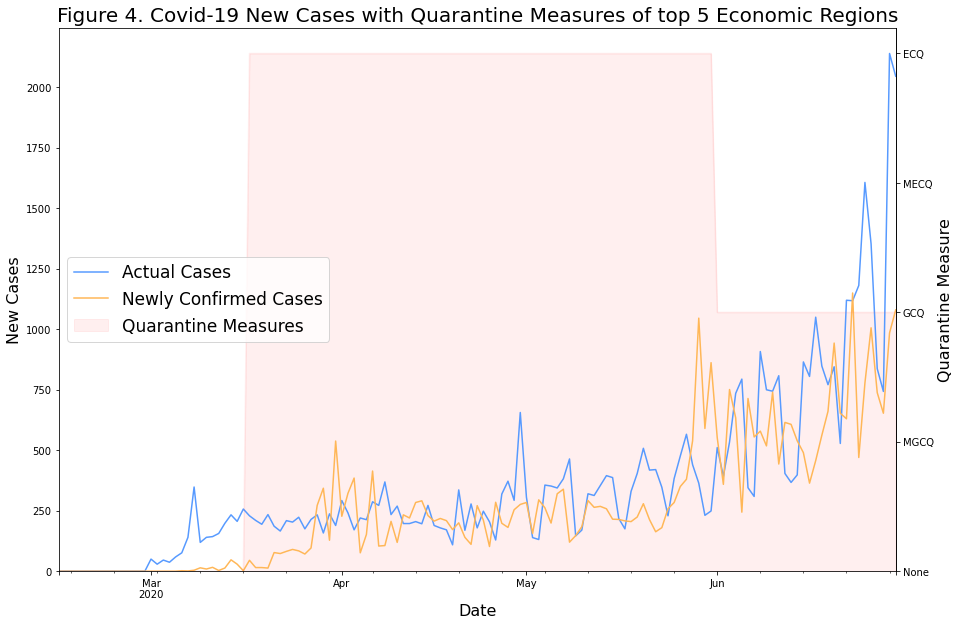

In [6]:
data_trimmed = data[(data.index.date > datetime.date(2020,2,14)) & (data.index.date < datetime.date(2020,7,1))]
axes_object = data_trimmed['actual_case'].plot(color='#579AFF', figsize=(15, 10), label='Actual Cases')

actual_case_max = data_trimmed['actual_case'].max()
confirmed_cases_max = data_trimmed['confirmed_new'].max()
my_max = actual_case_max if actual_case_max > confirmed_cases_max else confirmed_cases_max

# print(my_max)

data_with_q_mode2 = data_with_q_mode.copy()
data_with_q_mode2['mode Q Code'] = data_with_q_mode['mode Q Code'] * (my_max / 4)


axes_object4 = data_trimmed['confirmed_new'].plot(ax=axes_object, color='#FFB757', figsize=(15, 10), label='Newly Confirmed Cases')
axes_object4 = data_with_q_mode2['mode Q Code'].plot(ax=axes_object4, kind="area", alpha=0.09, color='#FF5757', figsize=(15, 10), label='Quarantine Measures')
axes_object4.set_title('Figure 4. Covid-19 New Cases with Quarantine Measures of top 5 Economic Regions', fontsize=20)
axes_object4.set_xlabel('Date', fontsize=16)
axes_object4.set_ylabel('New Cases', fontsize=16)
axes_object4.legend(fontsize=17, loc='center left')
secax = axes_object4.secondary_yaxis('right')
secax.set_ylabel('Quarantine Measure', fontsize=16)
secax.set_yticks([x * (my_max / 4) for x in range(5)])
secax.set_yticklabels(['None', 'MGCQ', 'GCQ', 'MECQ', 'ECQ'])
fig4 = axes_object4.get_figure()

# axes_object3.set_yticks([0, 1, 2, 3, 4])
# axes_object3.set_yticklabels(['None', 'MGCQ', 'GCQ', 'MECQ', 'ECQ'])

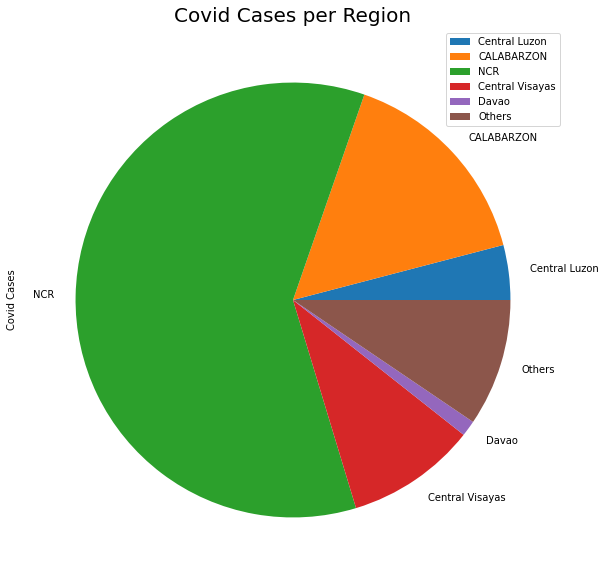

In [7]:
data5 = pd.read_csv('covid_spread_from_daily_summary.csv')
data5a = data5[['regions_ncr', 'regions_iv_a', 'regions_iii', 'regions_xi', 'regions_vii']]
data5b = [col for col in data5 if col.startswith('regions_')]
data6 = data5[data5b]

data_dict = {
    "Covid Cases": [data5['regions_iii'].sum(), data5['regions_iv_a'].sum(), data5['regions_ncr'].sum(), data5['regions_vii'].sum(), data5['regions_xi'].sum(), data6.sum().sum() - data5a.sum().sum()]
}

df_pie = pd.DataFrame(data=data_dict, index=['Central Luzon', 'CALABARZON', 'NCR', 'Central Visayas', 'Davao', 'Others'])
# print(df_pie)

axes_object5 = df_pie.plot.pie(y='Covid Cases', figsize=(10, 10))
axes_object5.set_title('Covid Cases per Region', fontsize=20)
fig5 = axes_object5.get_figure()

In [8]:
# Visualize your data
fig1.savefig('1_spread_benolirao_john.png')
fig2.savefig('2_spread_diff_benolirao_john.png')
fig3.savefig('3_q_modes_benolirao_john.png')
fig4.savefig('4_spread_with_q_modes_benolirao_john.png')
fig5.savefig('5_covid_pie_regions_benolirao_john.png')

# Figure1

Figure 1 shows the number of Actual New Covid 19 Cases for a particular day, and the Confirmed New Covid19 Cases for a given Day in 2020.

It can be seen that the Confirmed New Covid19 Cases gets larger as we progress through 2020. This is because the Confirmed Cases for a given day is not actually for that particular day. Rather, some (if not most) of the data are from previous dates. Thus, the Actual New Covid 19 Cases' previous entries gets updated rather than being reported as for the current day.


# Figure2

Figure 2 shows the difference of the Actual New Cases versus the Confirmed Cases at a particular day. A negative value indicates that the Actual Case is less than the number of Confirmed Cases for a given day. The more negative the value is, the more data gets disseminated to the previous dates.


# Figure3

Figure 3 shows the Quarantine Measures of the top 5 Philippine Economic Regions for a given date. For each region, its provinces' and highly urbanized cities' Quarantine Measures for the first 2 Quarters of 2020 are obtained.


# Figure4

Figure 4 shows the Quarantine Measures applied to a given date to the top 5 Philippine Economic Regions in comparison to the Number of Daily Covid 19 Cases. Data is limited to the first 2 Quarters of 2020. It can be observed that the trend of new covid 19 cases got larger around the same time as the implementation of GCQ (from ECQ).


# Figure5

Figure 5 shows the percentage of Covid Cases from each of the Top 5 Philippine Economic Regions.